# Big Data Management Workshop II
## Team A - Analysis of current cenergy consumption and production as well as future predictions

## 1. Questions
### 1.1 Descriptive questions:
#### 1.1.1 Energy production:
What are the current top 5 producing countries (total/per capita) of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind?
Which countries produce the most energy (total / per capita) currently?

#### 1.1.2 Energy consumption:
What are the top 5 consuming countries (total/per capita) of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind currently?
Which countries consume the most energy (total / per capita) now?

#### 1.1.3 Development of energy consumption and production:
What is the overall development of energy production within the last 50 years? 
What is the overall development of energy consumption within the last 50 years? 
How is the total and per capita production / consumption distributed across different continents?
Which country made the largest effort to reduce their fossil footprint in the last 10 years? Who is earth’s biggest winner / looser of the 21st century?

### 1.2 Explorative questions:
Which country will reach total statistical renewable energy consumption first based on our data?
When will Germany reach total statistical renewable energy consumption?
When will Germany reach total statistical renewable energy production?



### 2. Preparation
#### 2.1 Import libraries

In [60]:
from tabulate import tabulate
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'tabulate'

#### 2.2 Import the dataset World Energy Consumption
To work with the data we import it from the csv file into a pandas dataframe object

In [61]:
df = pd.read_csv("WorldEnergyConsumption.csv",sep=",")

#### 2.3 Exploration of data
To work with the data, we take a look at the columns and general shape of the data.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


In [63]:
df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17432.000000,7445.000000,10394.000000,4.862000e+03,7893.000000,6521.000000,8565.000000,9842.00000,9892.000000,4206.000000,...,5499.000000,4290.000000,1.045600e+04,6076.000000,1543.000000,4284.000000,4207.000000,4290.000000,5499.000000,4290.000000
mean,1973.094367,20.830774,8.798102,1.921623e+14,14.369018,18.242190,18.033792,inf,36.853247,1.549155,...,14.776571,29.375128,5.417833e+11,1.006011,313.478014,0.345406,2.163830,15.080935,53.625783,134.003056
std,34.333995,697.178744,135.503698,1.339910e+16,85.415649,335.492675,169.610587,NaN,267.425811,3.544546,...,58.750432,127.852638,4.083842e+12,3.680550,6836.857935,1.337962,17.013149,126.674141,209.543489,513.368047
min,1900.000000,-100.000000,-2326.870000,-1.000000e+02,-1054.320000,-100.000000,-2239.737000,-92.63200,-6083.407000,0.000000,...,0.000000,0.000000,1.963080e+08,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-1.532000,0.000000,0.000000e+00,0.000000,-1.429000,0.000000,-0.43075,-0.044000,0.000000,...,0.000000,0.000000,1.253804e+10,0.000000,2.159500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,0.000000,0.000000,2.583500e+00,0.000000,0.278000,0.000000,2.56700,0.735500,0.021500,...,0.000000,0.000000,4.281649e+10,0.000000,19.749000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,7.690000,0.334000,9.703500e+00,2.559000,9.091000,3.222000,6.87650,10.328250,1.362750,...,0.794000,0.295500,1.750000e+11,0.108250,50.000000,0.020000,0.010000,0.141000,3.046500,4.744750
max,2020.000000,44965.754000,3060.593000,9.342930e+17,2112.975000,25500.000000,2790.614000,inf,6446.809000,33.912000,...,825.094000,1763.675000,1.070000e+14,56.338000,242384.843000,20.660000,428.736000,3540.051000,2825.425000,6928.363000


In [64]:
df.shape

(17432, 122)

In [65]:
df_column_list = list(df.columns)
print('Header names of the data set columns:' )
for val in df_column_list:
    print('- ' + val + '/n')


Header names of the data set columns:
- iso_code/n
- country/n
- year/n
- coal_prod_change_pct/n
- coal_prod_change_twh/n
- gas_prod_change_pct/n
- gas_prod_change_twh/n
- oil_prod_change_pct/n
- oil_prod_change_twh/n
- energy_cons_change_pct/n
- energy_cons_change_twh/n
- biofuel_share_elec/n
- biofuel_elec_per_capita/n
- biofuel_cons_change_pct/n
- biofuel_share_energy/n
- biofuel_cons_change_twh/n
- biofuel_consumption/n
- biofuel_cons_per_capita/n
- carbon_intensity_elec/n
- coal_share_elec/n
- coal_cons_change_pct/n
- coal_share_energy/n
- coal_cons_change_twh/n
- coal_consumption/n
- coal_elec_per_capita/n
- coal_cons_per_capita/n
- coal_production/n
- coal_prod_per_capita/n
- electricity_generation/n
- biofuel_electricity/n
- coal_electricity/n
- fossil_electricity/n
- gas_electricity/n
- hydro_electricity/n
- nuclear_electricity/n
- oil_electricity/n
- other_renewable_electricity/n
- other_renewable_exc_biofuel_electricity/n
- renewables_electricity/n
- solar_electricity/n
- wi

Let's take a quick look at some data entries to get a better understanding of the data.

In [66]:
df.head(10)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Afghanistan,1905,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Afghanistan,1906,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Afghanistan,1907,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Afghanistan,1908,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Afghanistan,1909,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Cleansing and restrukturing of the data
To work with the data, we have to remove unusable and not relevant data as well as missing data points.

1. Look for null values and whether they can be reduced or should be kept (more data in the row)
2. Look for empty rows
3. Looking for duplicates

#### 3.1 Looking for null values
Check if there are any null values in the dataset. From the exploration before we know that there have to be at least some.

In [67]:
df.isna().apply(pd.value_counts)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
False,15630,17432.0,17432.0,7445,10394,4862,7893,6521,8565,9842,...,5499,4290,10456,6076,1543,4284,4207,4290,5499,4290
True,1802,NaN,NaN,9987,7038,12570,9539,10911,8867,7590,...,11933,13142,6976,11356,15889,13148,13225,13142,11933,13142


Now we look more closely for the number of null values

In [68]:
df.isnull().sum()

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

Especially in the renewable energy sector we have a lot of null values since it is a more recent technology and the data stretches back until 1901.

We have to keep this in mind to map the null values properly. Removing them fully would lead to a largely reduced data set with incomplete data.  df = df.dropna() --> results in a reduction from >17000 entries to 14.


#### 3.2 Looking for empty rows
Since we cannot remove single fields we can check for rows that might be completely empty. Those we can delete savely. From earlied we know that country and year are always present so we need to drop those two columns first before can look for empty rows, otherwise we would recieve no results.

In [69]:
temp_df = df.drop(columns=['country', 'year'])
empty_row_indexes = temp_df.index[temp_df.isna().all(axis=1)].tolist()

print (empty_row_indexes)

[]


There are no empty rows that we could drop.

#### 3.3 Looking for duplicated entries
As our next step, we search for duplicate entries.

In [70]:
df.duplicated().sum()

0

0 means that there are no duplicate entries in our data set.

### 4. Logical cleaning of our data
After we looked at the data set from a technical approach to identify the null values, to remove empty rows as well as duplicates we can start to logically clean our data. The maximum data we need is a view back the last 50 years.


In [71]:
target_year_cap = 2019 - 50;
print('Last year: ' + str(target_year_cap))

Last year: 1969


Thus we remove every entry that contains data that is older than 1969.

In [72]:
wdf = df
bigger_than_1950 = wdf['year'] >= target_year_cap
wdf  = wdf[bigger_than_1950]

wdf.shape

(10825, 122)

As a result, we removed around 7000 entries that are not necessary for our analysis.

### 5. Analysis
#### 5.1 What are the current top 5 producing countries (total/per capita) of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind?
##### 5.1.1 Countries that currently (2019) produce the most energy in total (independent of type)


In [117]:
df_511 = wdf
target_year_511 = 2019
is_2019 =  df_511['year'] == target_year_511
is_country = np.logical_and(df_511['iso_code'] != 'OWID_WRL', df_511['iso_code'].notnull())
df_511  =  df_511[is_2019]
df_511  = df_511[is_country]
df_511_ref  =  df_511[['iso_code', 'country', 'electricity_generation', 'fossil_electricity', 'renewables_electricity', 'other_renewable_electricity']]
# select the top 5 - total
df_511_electricity_total_5 = df_511_ref.nlargest(5, 'electricity_generation')

<ipython-input-117-39ea59ad4775>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_511  = df_511[is_country]


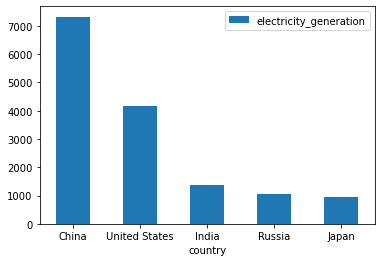

In [118]:
ax = df_511_electricity_total_5.plot.bar(x='country', y='electricity_generation', rot=0)

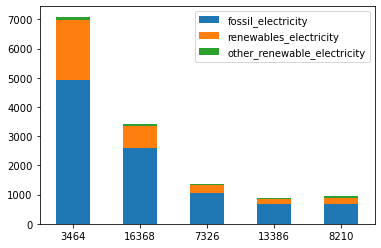

In [119]:
# stack renewable and non renewable
df_511_electricity_fossil_renweable_stacked = df_511_ref.nlargest(5, 'electricity_generation')
df_511_electricity_fossil_renweable_stacked = df_511_electricity_fossil_renweable_stacked.drop(columns=['electricity_generation'])
ax = df_511_electricity_fossil_renweable_stacked.plot.bar(rot=0, stacked=True)